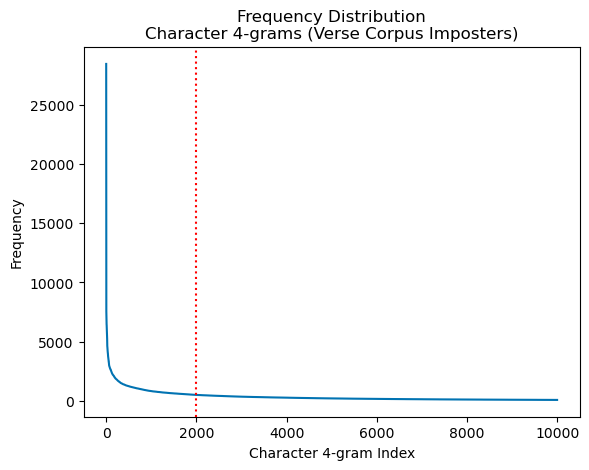

Top 100 most frequent 4-grams along with their overall frequency:

[('que_', 28449), ('_et_', 14138), ('ere_', 9188), ('_qua', 7554),
 ('_in_', 7241), (',_qu', 6895), ('ibus', 6885), ('sque', 6763), ('bus_', 6437),
 ('us_a', 6434), ('tus_', 6420), ('_qui', 6317), ('tis_', 6275), ('mque', 6200),
 ('non_', 5852), ('_quo', 5657), ('_pro', 5551), ('_est', 5548), ('_per', 5521),
 ('s_in', 5367), ('_con', 5313), ('_non', 5223), ('ris_', 4753), ('nec_', 4736),
 ('is,_', 4632), ('is_a', 4607), ('tum_', 4564), ('enti', 4497), ('us_e', 4452),
 ('_par', 4421), ('tur_', 4347), ('s_et', 4223), ('_ill', 4214), ('rum_', 4115),
 ('aque', 4077), ('ente', 4047), ('us,_', 4033), ('us_i', 4029), ('cum_', 3954),
 ('umqu', 3952), ('_nec', 3938), ('erat', 3838), ('tque', 3735), ('t_in', 3717),
 ('ine_', 3706), ('per_', 3666), ('_fer', 3604), ('quae', 3594), ('quam', 3558),
 ('est_', 3545), ('es,_', 3465), ('ius_', 3451), ('ens_', 3423), ('iam_', 3398),
 ('is_i', 3333), ('ore_', 3328), ('mina', 3318), ('is_e'

In [4]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')  # set colorblind palette for colour-blind friendly colours

from collections import Counter

def read_corpus(directory):
    """
    Reads all .txt files in the specified directory and combines them into a single string.

    Parameters:
    directory (str): The path to the directory containing .txt files.

    Returns:
    str: Combined text of all files in the directory.
    """
    corpus = ""
    # Using Path() from pathlib to iterate over files
    for filepath in Path(directory).glob("*.txt"):
        with filepath.open('r', encoding='utf-8') as file:
            text = file.read()
            corpus += text + " "
    return corpus

def vectorize_texts(max_features, analyzer, ngram_range, corpus_directory, reverse):
    """
    Vectorizes the text corpus into n-grams and returns their counts.

    Parameters:
    max_features (int): Maximum number of features to extract.
    analyzer (str): Type of n-gram ('word', 'char', 'char_wb').
    ngram_range (tuple): The range of n-gram values to use.
    corpus_directory (str): The directory containing the text corpus files.
    reverse (bool): Whether to sort the n-grams in descending order of frequency.

    Returns:
    tuple: List of counts and list of (n-gram, count) tuples sorted by frequency.
    """
    corpus = read_corpus(corpus_directory)

    vectorizer = CountVectorizer(max_features=max_features, analyzer=analyzer, ngram_range=ngram_range)
    X = vectorizer.fit_transform([corpus])

    ngram_counts = list(zip(vectorizer.get_feature_names_out(), X.toarray()[0]))
    ngram_counts_sorted = sorted(ngram_counts, key=lambda x: x[1], reverse=reverse)
    ngram_counts_sorted = [(word.replace(" ", "_"), count) for (word, count) in ngram_counts_sorted]  # underscore to denote whitespace

    counts = [count for word, count in ngram_counts_sorted]

    return counts, ngram_counts_sorted

if __name__ == "__main__":
    counts, ngram_counts_sorted = vectorize_texts(
        max_features=10000,  # upper limit features
        analyzer='char',  # characters
        ngram_range=(4, 4),  # 4-grams
        corpus_directory=Path('../../corpora/corpus_imposters/'),
        reverse=True  # descending order
    )

    # define the results directory path using pathlib
    results_dir = Path('..') / '..' / 'results' / 'freq_dist_res'
    results_dir.mkdir(parents=True, exist_ok=True)  # create directory if it does not exist

    # save the plot using the results directory path
    ax = sns.lineplot(data=counts)
    plt.axvline(2000, color='r', linestyle='dotted')  # 2000th most frequent character 4-gram
    ax.set_title("Frequency Distribution\nCharacter 4-grams (Verse Corpus Imposters)")
    ax.set_xlabel("Character 4-gram Index")
    ax.set_ylabel("Frequency")
    plt.savefig(results_dir / 'freq_dist_char_4grams.pdf', dpi=500)  # save file in results_dir
    plt.show()

    # print the top 100 n-grams
    import pprint
    print("Top 100 most frequent 4-grams along with their overall frequency:\n")
    pprint.pprint(ngram_counts_sorted[:101], compact=True)